# CS 4661 Project

# Buy Or Sell a Stock? - Logistic Regression

In [1]:
# import necessary tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
# read dataset
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
import datetime as dt
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['date']=stock_df['date'].map(dt.datetime.toordinal)
# gets the top 10 stocks in alphabetical order
# stock_df_top10 sstock_df_aal = stock_df[0:1259]tock_df[0:12590]

In [3]:
# stock_df_top10[::1259]
# stock_df['date']=stock_df['date'].map(dt.datetime.fromordinal)
# import pandas_ta
# get only AAL data


stock_df_aal = stock_df[0:1259]
stock_df_aal.pop("open")
stock_df_aal.pop("low")
stock_df_aal.pop("high")
stock_df_aal.pop("volume")
# stock_df_aal.ta.ema(close='close', length=10, append=True)
stock_df_aal.insert(0,"weekly_avg", " ")
stock_df_aal.insert(0,"30_entry_avg", " ")
stock_df_aal.insert(0,"50_entry_avg", " ")
stock_df_aal.insert(0,"100_entry_avg", " ")
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,734907,14.75,AAL
1,,,,,734910,14.46,AAL
2,,,,,734911,14.27,AAL
3,,,,,734912,14.66,AAL
4,,,,,734913,13.99,AAL
...,...,...,...,...,...,...,...
1254,,,,,736726,53.88,AAL
1255,,,,,736727,52.10,AAL
1256,,,,,736730,49.76,AAL
1257,,,,,736731,51.18,AAL


In [7]:
#populate the 4 new columns of the dataset
pd.options.mode.chained_assignment = None  # default='warn'
for x in range(14,1259):
    stock_df_aal["weekly_avg"][x] = stock_df_aal["close"][x-14:x-7].mean()
for x in range(37,1259):
    stock_df_aal["30_entry_avg"][x] = stock_df_aal["close"][x-30-7:x-7].mean()
for x in range(57,1259):
    stock_df_aal["50_entry_avg"][x] = stock_df_aal["close"][x-50-7:x-7].mean()
for x in range(107,1259):
    stock_df_aal["100_entry_avg"][x] = stock_df_aal["close"][x-100-7:x-7].mean()
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,734907,14.75,AAL
1,,,,,734910,14.46,AAL
2,,,,,734911,14.27,AAL
3,,,,,734912,14.66,AAL
4,,,,,734913,13.99,AAL
...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,736726,53.88,AAL
1255,49.7839,51.4362,53.552667,58.2,736727,52.10,AAL
1256,49.8886,51.6166,53.678333,57.674286,736730,49.76,AAL
1257,49.9717,51.7612,53.736667,56.97,736731,51.18,AAL


In [29]:
stock_df_aal['Buy or Sell'] = np.where(stock_df_aal['close'].shift(-1) > stock_df_aal['close'],1,-1)
# -1 indicates we should sell the stock
# 1 indicates we should buy the stock
stock_df_aal


,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name,Buy or Sell
0,,,,,734907,14.75,AAL,-1
1,,,,,734910,14.46,AAL,-1
2,,,,,734911,14.27,AAL,1
3,,,,,734912,14.66,AAL,-1
4,,,,,734913,13.99,AAL,1
...,...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,736726,53.88,AAL,-1
1255,49.7839,51.4362,53.552667,58.2,736727,52.10,AAL,-1
1256,49.8886,51.6166,53.678333,57.674286,736730,49.76,AAL,1
1257,49.9717,51.7612,53.736667,56.97,736731,51.18,AAL,1


In [33]:
stock_df_aal = stock_df_aal[107:1259]

<AxesSubplot:>

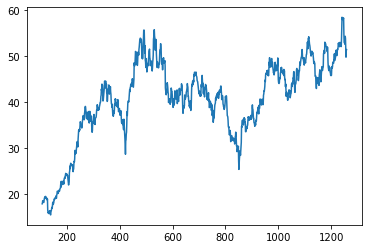

In [34]:
# Shows the closing prices of the stock in the past 3 years
stock_df_aal.close.plot()

In [35]:
# Split data into feature set and target set
feature_cols_1 = ['date','100_entry_avg','50_entry_avg','30_entry_avg','weekly_avg']
feature_cols_2 = ['date','weekly_avg']
feature_cols_3 = ['date','30_entry_avg']
feature_cols_4 = ['date','100_entry_avg']
feature_cols = ['date']

# feature_cols = ["date","30_entry_avg"]

# features variable (X)
X_all = scale(stock_df_aal[feature_cols_1])
X_week = scale(stock_df_aal[feature_cols_2])
X_month = scale(stock_df_aal[feature_cols_3])
X_date_only = scale(stock_df_aal[feature_cols])
X_100 = scale(stock_df_aal[feature_cols_4])

# target variables (y)
y = ["Buy or Sell"]



In [36]:
# split data into training and testing
import math
s_f = .6
n_train = math.floor(s_f * X_all.shape[0])
n_test = math.ceil((1-s_f) * X_all.shape[0])

X_train_all = X_all[:n_train]
y_train_all = y[:n_train]
X_test_all = X_all[n_train:]
y_test_all = y[n_train:]


X_train_week = X_week[:n_train]
y_train_week = y[:n_train]
X_test_week = X_week[n_train:]
y_test_week = y[n_train:]

X_train_month = X_month[:n_train]
y_train_month = y[:n_train]
X_test_month = X_month[n_train:]
y_test_month = y[n_train:]

X_train_date_only = X_date_only[:n_train]
y_train_date_only = y[:n_train]
X_test_date_only = X_date_only[n_train:]
y_test_date_only = y[n_train:]

X_train_100 = X_100[:n_train]
y_train_100 = y[:n_train]
X_test_100 = X_100[n_train:]
y_test_100 = y[n_train:]

In [ ]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_regression_all = LogisticrRegression()
log_regression_week = LogisticRegression()
log_regression_month = LogisticRegression()
log_regression_100 = LogisticRegression()
log_regression_date = LogisticRegression()

log_regression_all.fit(X_train_all,y_train_all)
y_predict_all = linear_regression_all.predict(X_test_all)
mse_list = cross_val_score(linear_regression_all, X_test_all, y_test_all, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_week.fit(X_train_week,y_train_week)
y_predict_week = linear_regression_week.predict(X_test_week)
mse_list = cross_val_score(linear_regression_week, X_test_week, y_test_week, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_month.fit(X_train_month,y_train_month)
y_predict_month = linear_regression_month.predict(X_test_month)
mse_list = cross_val_score(linear_regression_month, X_test_month, y_test_month, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_date.fit(X_train_date_only,y_train_date_only)
y_predict_date = linear_regression_date.predict(X_test_date_only)
mse_list = cross_val_score(linear_regression_date, X_test_date_only, y_test_all, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_100.fit(X_train_100,y_train_100)
y_predict_100 = linear_regression_100.predict(X_test_100)
mse_list = cross_val_score(linear_regression_100, X_test_100, y_test_100, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())